# INNOMATICS RESEARCH LAB

# INTERNSHIP SESSION TASK 

# MACHINE LEARNING TASK-1

# DATASET: DIAMONDS DATASET

# PROBLEM: REGRESSION

# TARGET VARIABLE: PRICE

# Description Of Features

## Qualitative Features (Categorical) : Cut, Color, Clarity

## Quantitative Features (Numerical) : Carat, Depth , Table , Price , X , Y, Z

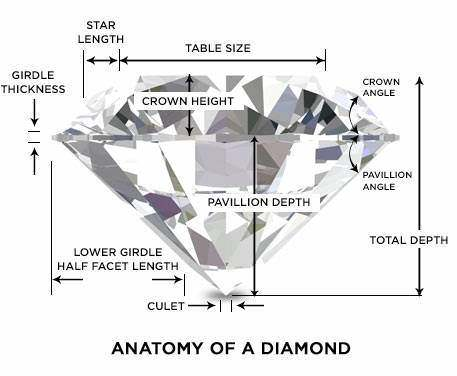

# ALGORITHM USED -KNN

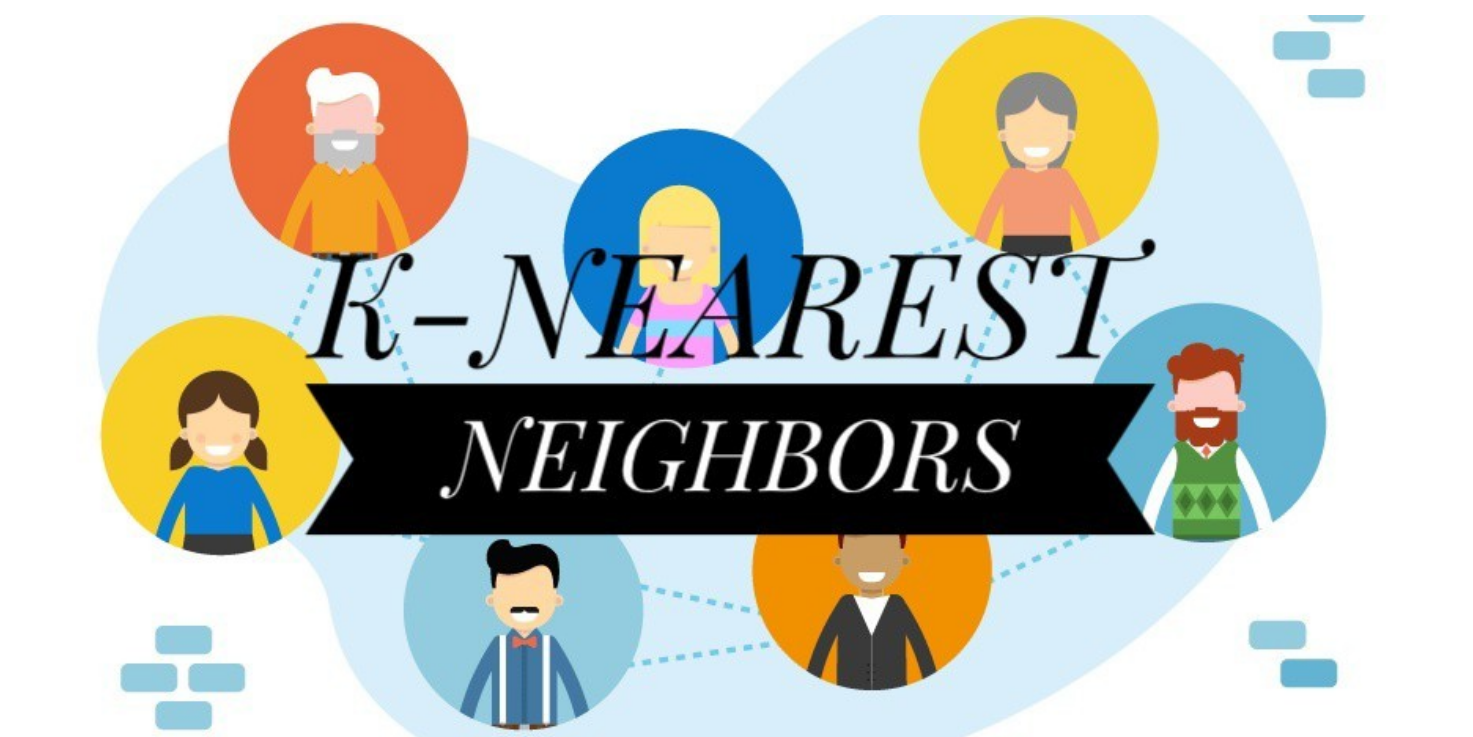

# Most Common Distances

# The kNN Algorithm

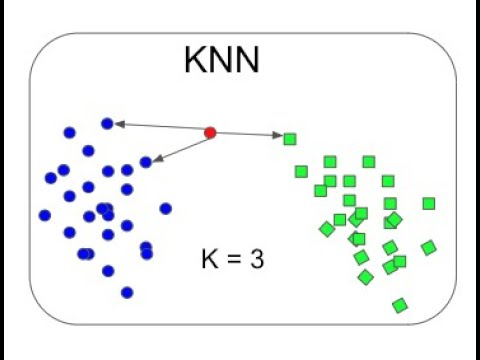

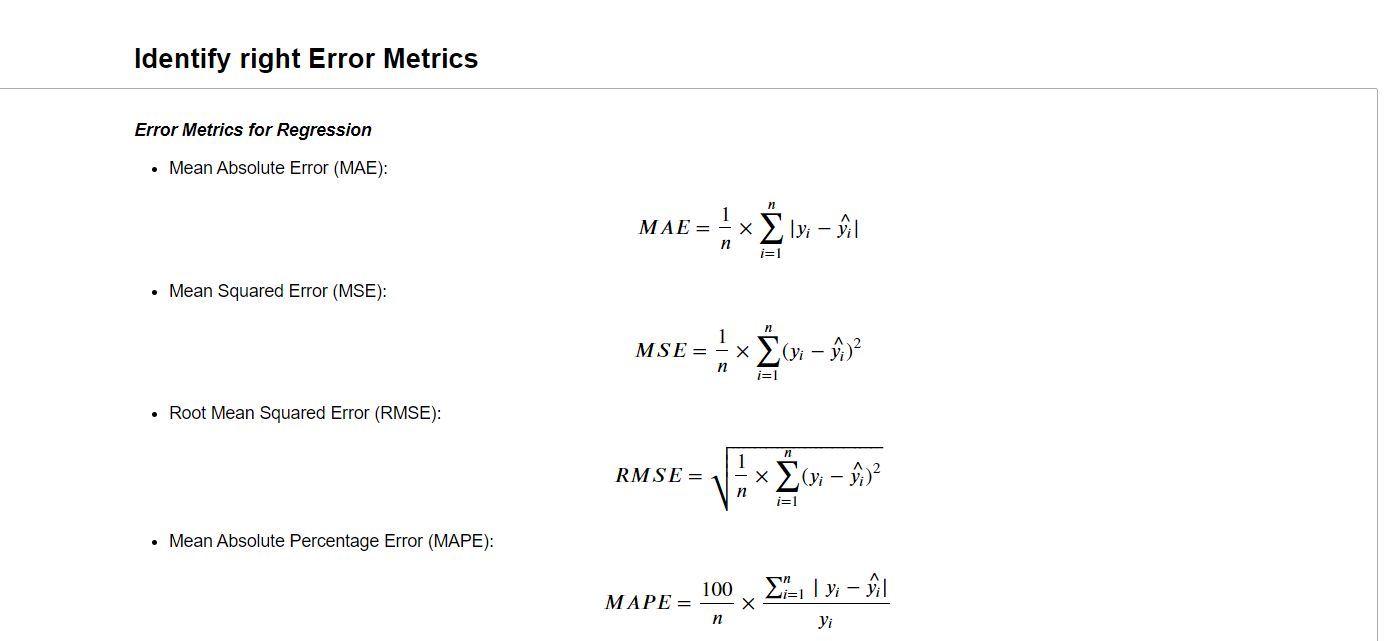

# OBJECTIVE:

## Building a regression model to predict the price of the diamond based on other factors and understand the influence of other attributes on price.

# IMPORT LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from scipy.stats import mode
from random import randrange
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import operator
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
import numpy

# LOAD THE DATA

In [3]:
data = pd.read_csv("diamonds.csv")

# CHECK THE NUMBER OF ROWS AND COLUMNS

In [4]:
data.shape

(53940, 10)

# FIRST FIVE ROWS OF DATASET

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# CHECK THE DATA TYPES 

In [6]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

# Summary

In [7]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Finding the missing values

In [8]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Compute the data distribution by levels

In [9]:
data.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

# Check The Duplicate Rows

In [10]:
print(f"There are {data.duplicated().sum()} duplicate rows in the data set.")

There are 146 duplicate rows in the data set.


# Remove Duplicate Rows

In [11]:
data=data.drop_duplicates()
print("The duplicate rows are removed.")

The duplicate rows are removed.


# Checking Number Of Rows and Columns After Removing Duplicates

In [12]:
data.shape

(53794, 10)

# Columns Of The Dataset

In [13]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

# Store categorical and numerical attribute name

In [14]:
num_attr = ["carat","depth","table","price","x","y","z"]
cat_attr = ["cut","color","clarity"]

# Convert all attribute to appropriate type

In [15]:
data[cat_attr] = data[cat_attr].astype('category')

In [16]:
data[num_attr] = data[num_attr].astype('float')

# Checking Data Types After Conversion 

In [17]:
data.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price       float64
x           float64
y           float64
z           float64
dtype: object

# Feature Engineering

# CUT

### Although the Carat Weight of a Diamond has the Strongest Effect on Prices, the Cut can still Drastically Increase or Decrease its value

### With a Higher Cut Quality, the Diamond’s Cost per Carat Increases.

### This is because there is a Higher Wastage of the Rough Stone as more Material needs to be Removed in order to achieve better Proportions and Symmetry.

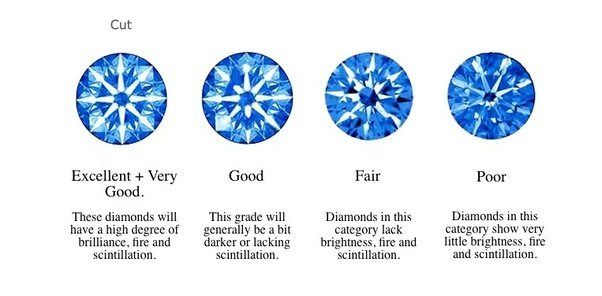

# Let's see how many unique categories we have in cut property

In [18]:
cut = set(data['cut'])
print(cut)

{'Ideal', 'Good', 'Premium', 'Fair', 'Very Good'}


# Mapping the values using map function

In [19]:
data['cut'] = data['cut'].map({'Very Good': 0, 'Fair': 1, 'Good': 2, 'Premium': 3, 'Ideal': 4}).astype(int)

# COLOR

## The Color of a Diamond refers to the Tone and Saturation of Color, or the Depth of Color in a Diamond

## The Color of a Diamond can Range from Colorless to a Yellow or a Faint Brownish Colored hue

## Colorless Diamonds are Rarer and more Valuable because they appear Whiter and Brighter

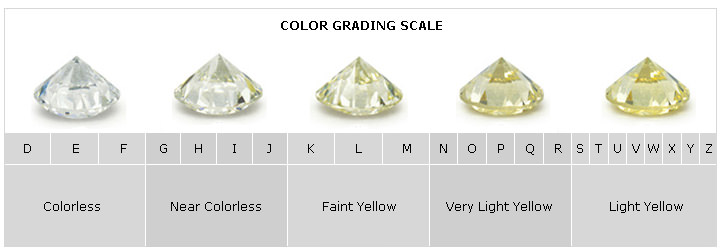

# Let's see how many unique categories we have in color property

In [20]:
color = set(data['color'])
print(color)

{'I', 'H', 'J', 'E', 'G', 'D', 'F'}


# Mapping the values using map function

In [21]:
data['color'] = data['color'].map({'E': 0, 'H': 1, 'I': 2, 'J': 3, 'F': 4, 'D': 5, 'G':6}).astype(int)

# CLARITY

## Diamond Clarity refers to the absence of the Inclusions and Blemishes.

## An Inclusion is an Imperfection located within a Diamond. Inclusions can be Cracks or even Small Minerals or Crystals that have formed inside the Diamond.

## Blemishing is a result of utting and polishing process than the environmental conditions in which the diamond was formed. It includes scratches, extra facets etc

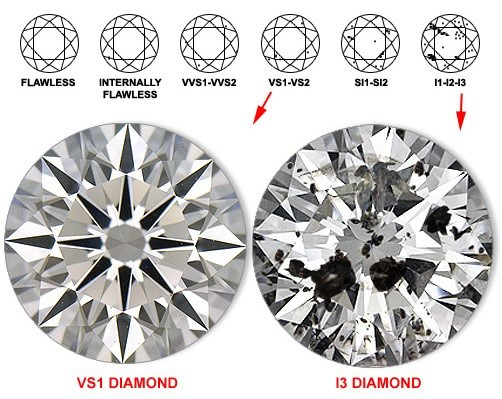

# Let's see how many unique categories we have in clarity property

In [22]:
clarity = set(data['clarity'])
print(clarity)

{'VS2', 'VVS2', 'SI1', 'VVS1', 'I1', 'IF', 'VS1', 'SI2'}


# Mapping the values using map function

In [23]:
data['clarity'] = data['clarity'].map({'VS2': 0, 'VVS2': 1, 'VVS1': 2, 'VS1': 3, 'SI1': 4, 'IF': 5, 'SI2':6, 'I1': 7}).astype(int)

# The min of x, y and z!

In [24]:
data.loc()

In [25]:
len(data[(data['x']==0) | (data['y']==0) | (data['z']==0)])

19

# So there are 19 rows with dimension of zero

## Removal of rows with dimension of zero instead of filling them with mean

In [26]:
data = data[(data[['x','y','z']] != 0).all(axis=1)]

# Just to Confirm
data.loc[(data['x']==0) | (data['y']==0) | (data['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


# Correlation Between Features

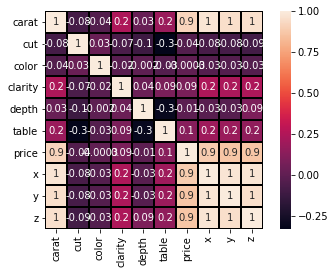

In [27]:
# Correlation Map
corr = data.corr()
sns.heatmap(data=corr, square=True , annot=True, cbar=True, linewidths=1, linecolor='black',fmt='.0g')

# CONCLUSION

# UNIVARIATE ANALYSIS

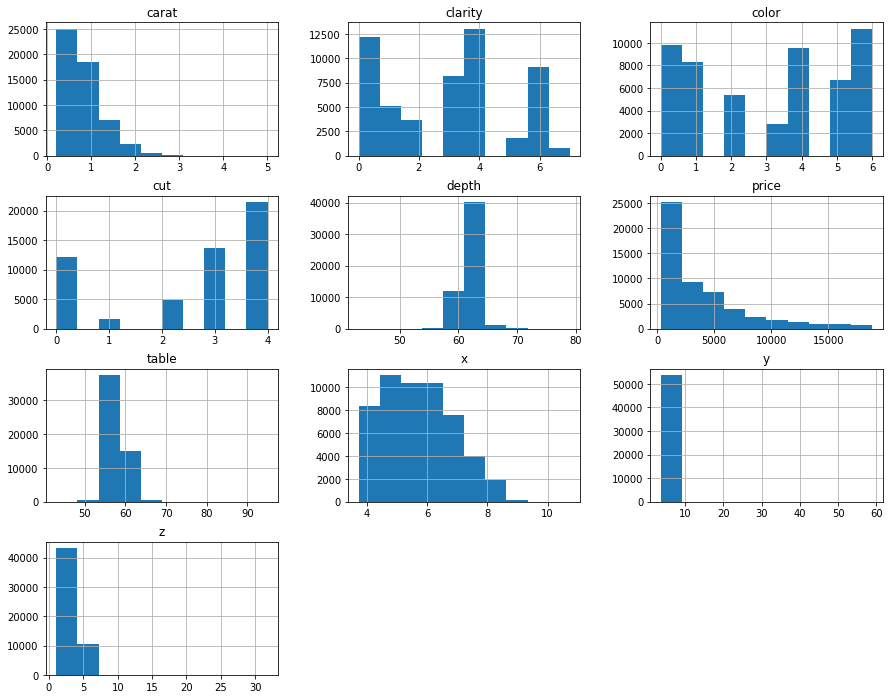

In [28]:
data.hist(figsize=(15,12));

# Box Plots to analyze outliers

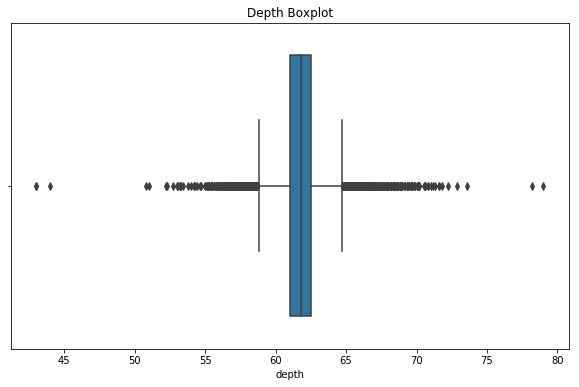

In [29]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data.depth)
plt.title('Depth Boxplot')
plt.show()

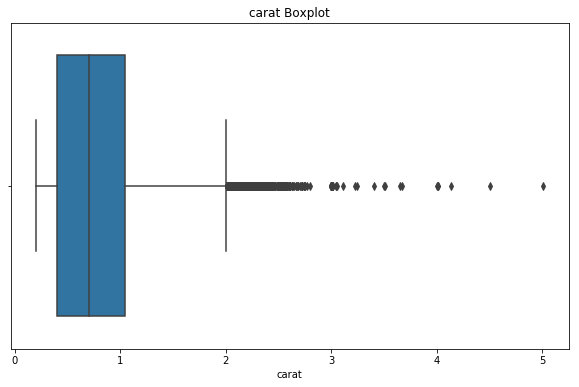

In [30]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data.carat)
plt.title('carat Boxplot')
plt.show()

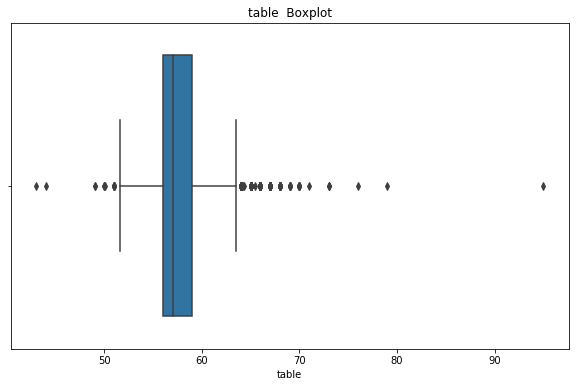

In [31]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data.table)
plt.title('table  Boxplot')
plt.show()

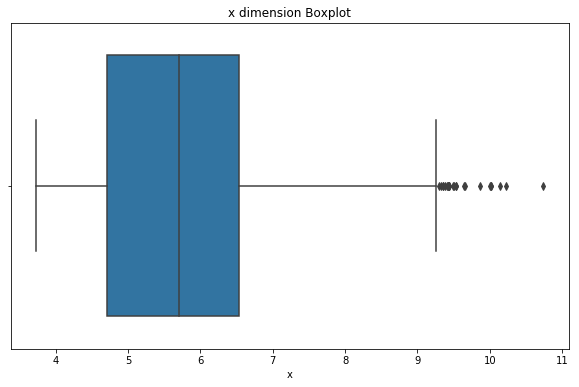

In [32]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data.x)
plt.title('x dimension Boxplot')
plt.show()

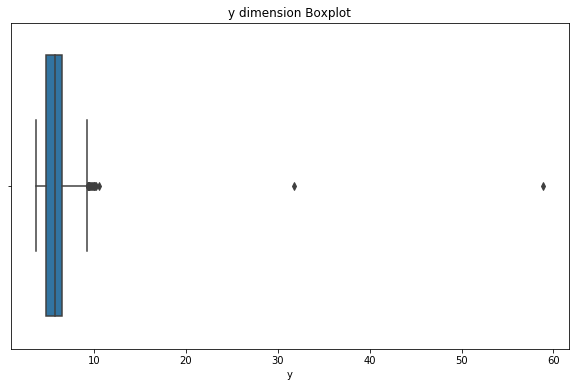

In [33]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data.y)
plt.title('y dimension Boxplot')
plt.show()

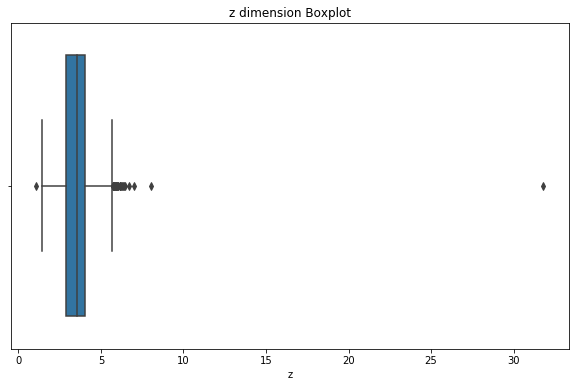

In [34]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data.z)
plt.title('z dimension Boxplot')
plt.show()

# Box Plot for categorical variables

# Diamond Cut vs Price

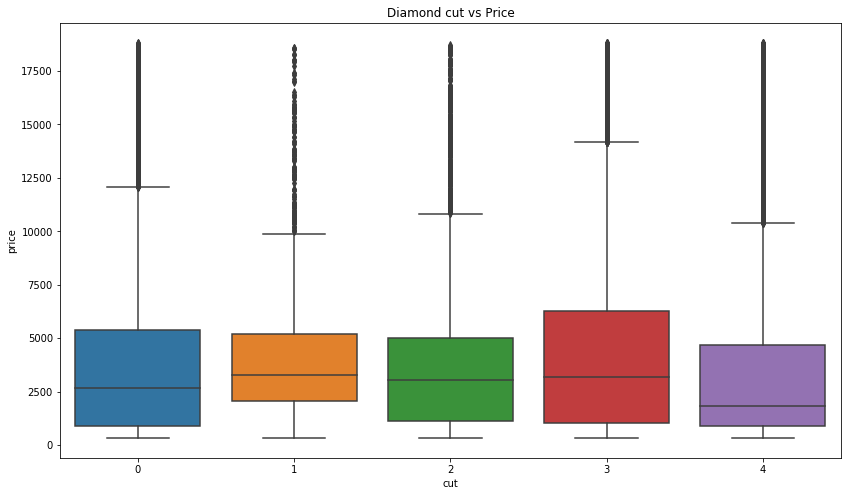

In [35]:
fig = plt.figure(figsize=(14,8))
sns.boxplot(y=data.price,x=data.cut)
plt.title("Diamond cut vs Price")
plt.show()

# Diamond color vs Price

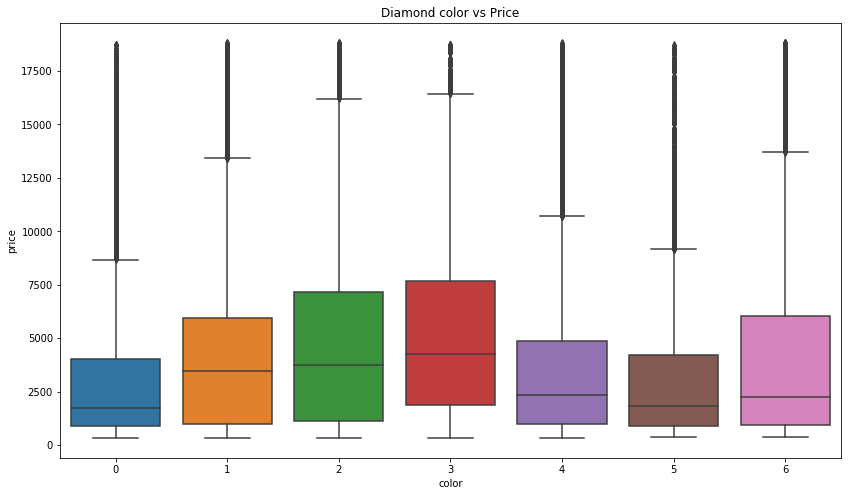

In [36]:
fig = plt.figure(figsize=(14,8))
sns.boxplot(y=data.price,x=data.color)
plt.title("Diamond color vs Price")
plt.show()

# Diamond clarity vs Price

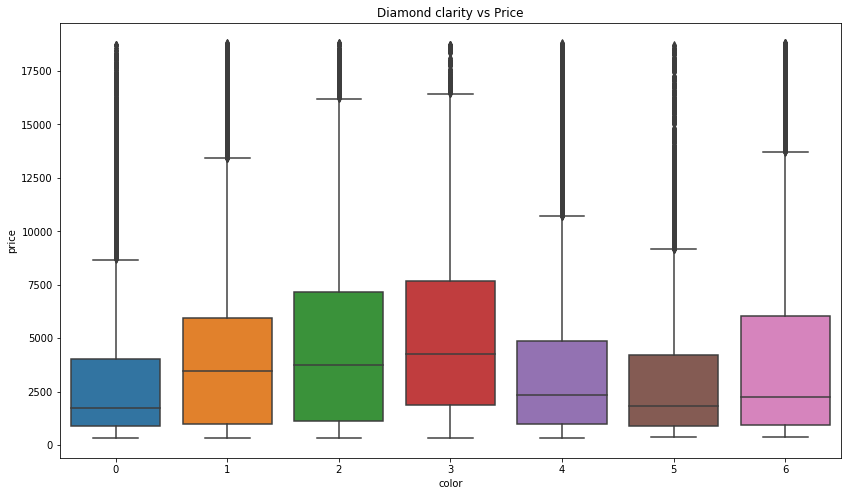

In [37]:
fig = plt.figure(figsize=(14,8))
sns.boxplot(y=data.price,x=data.color)
plt.title("Diamond clarity vs Price")
plt.show()

# Depth

## The Depth of a Diamond is its Height (in millimeters) measured from the Culet to the Table.

## If a Diamond's Depth Percentage is too large or small the Diamond will become Dark in appearance because it will no longer return an Attractive amount of light.

# Handling Extreme Values

# DEPTH

## Finding the Boundary Values

In [38]:
print("Highest allowed",data['depth'].mean() + 3*data['depth'].std())
print("Lowest allowed",data['depth'].mean() - 3*data['depth'].std())

Highest allowed 66.03715041370982
Lowest allowed 57.45931448633513


## Finding the Outliers

In [39]:
data[(data['depth'] > 65.65) | (data['depth'] < 56.94)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2,0.23,2,0,3,56.9,65.0,327.0,4.05,4.07,2.31
91,0.86,1,0,6,55.1,69.0,2757.0,6.45,6.33,3.52
97,0.96,1,4,6,66.3,62.0,2759.0,6.27,5.95,4.07
129,0.91,1,1,6,65.7,60.0,2763.0,6.03,5.99,3.95
204,0.98,1,1,6,67.9,60.0,2777.0,6.05,5.97,4.08
227,0.84,1,6,4,55.1,67.0,2782.0,6.39,6.20,3.47
255,1.05,1,3,6,65.8,59.0,2789.0,6.41,6.27,4.18
298,1.01,1,0,6,67.4,60.0,2797.0,6.19,6.05,4.13
352,0.90,1,2,4,67.3,59.0,2804.0,5.93,5.84,3.96
369,1.00,1,6,7,66.4,59.0,2808.0,6.16,6.09,4.07


## Trimming of Outliers

In [40]:
data = data[(data['depth'] < 65.65) & (data['depth'] > 56.94)]
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,0,6,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,0,4,59.8,61.0,326.0,3.89,3.84,2.31
3,0.29,3,2,0,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,2,3,6,63.3,58.0,335.0,4.34,4.35,2.75
5,0.24,0,3,1,62.8,57.0,336.0,3.94,3.96,2.48
6,0.24,0,2,2,62.3,57.0,336.0,3.95,3.98,2.47
7,0.26,0,1,4,61.9,55.0,337.0,4.07,4.11,2.53
8,0.22,1,0,0,65.1,61.0,337.0,3.87,3.78,2.49
9,0.23,0,1,3,59.4,61.0,338.0,4.00,4.05,2.39
10,0.30,2,3,4,64.0,55.0,339.0,4.25,4.28,2.73


## Capping on Outliers

In [41]:
upper_limit = data['depth'].mean() + 3*data['depth'].std()
lower_limit = data['depth'].mean() - 3*data['depth'].std()

## Now, apply the Capping

In [42]:
data['depth'] = np.where(
    data['depth']>upper_limit,
    upper_limit,
    np.where(
        data['depth']<lower_limit,
        lower_limit,
        data['depth']
    )
)

## Now see the statistics using “Describe” Function

In [43]:
data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53075.000000,53075.000000,53075.000000,53075.000000,53075.000000,53075.000000,53075.000000,53075.000000,53075.000000,53075.000000
mean,0.794155,2.594988,3.104682,2.918191,61.721670,57.437232,3928.202694,5.724741,5.729016,3.534155
std,0.471195,1.565877,2.216154,2.139239,1.274434,2.201105,3991.767599,1.118518,1.140136,0.700109
min,0.200000,0.000000,0.000000,0.000000,57.874047,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,1.000000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,4.000000,3.000000,61.800000,57.000000,2393.000000,5.690000,5.700000,3.520000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5330.000000,6.540000,6.530000,4.030000
max,5.010000,4.000000,6.000000,7.000000,65.564822,95.000000,18823.000000,10.740000,58.900000,31.800000


# CARAT

### Carat refers to the Weight of the Stone, not the Size.

### The Weight of a Diamond has the most significant Impact on its Price.

### Since the larger a Stone is, the Rarer it is, one 2 Carat Diamond will be more Expensive than the Total cost of two 1 Carat Diamonds of the Same Quality.

### The carat of a Diamond is often very Important to People when shopping But it is a Mistake to Sacrifice too much quality for sheer size.

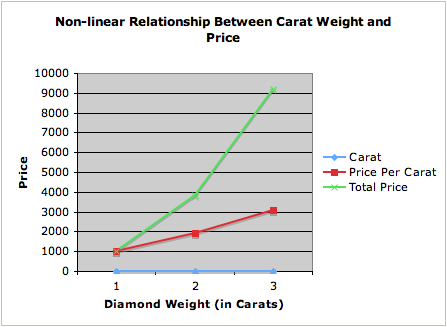

## HANDLING OUTLIERS IN THE COLUMN CARAT

## Finding the Boundary Values

In [44]:
print("Highest allowed",data['carat'].mean() + 3*data['carat'].std())
print("Lowest allowed",data['carat'].mean() - 3*data['carat'].std())

Highest allowed 2.207739461904197
Lowest allowed -0.6194293347257378


## Finding the Outliers

In [45]:
data[(data['carat'] > 2.20) | (data['depth'] < -0.61)]

,carat,cut,color,clarity,depth,table,price,x,y,z
16283,3.00,0,1,7,63.100000,55.0,6512.0,9.23,9.10,5.77
16341,2.21,3,1,7,62.200000,58.0,6535.0,8.31,8.27,5.16
17466,2.23,0,6,7,63.500000,57.0,7006.0,8.24,8.20,5.22
17560,2.25,1,6,7,64.900000,58.0,7069.0,8.15,8.12,5.28
17897,2.30,3,6,7,60.200000,59.0,7226.0,8.71,8.56,5.19
19081,2.50,1,6,7,64.700000,57.0,7854.0,8.48,8.44,5.47
19339,3.01,3,2,7,62.700000,58.0,8040.0,9.10,8.97,5.67
19598,2.33,3,1,7,60.700000,58.0,8220.0,8.64,8.56,5.22
19866,2.68,3,6,7,58.600000,60.0,8419.0,9.11,9.07,5.33
19894,2.25,0,3,6,60.600000,63.0,8442.0,8.45,8.38,5.10


## Trimming of Outliers

In [46]:
data = data[(data['carat'] < 2.20) & (data['carat'] > -0.61)]
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,0,6,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,0,4,59.8,61.0,326.0,3.89,3.84,2.31
3,0.29,3,2,0,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,2,3,6,63.3,58.0,335.0,4.34,4.35,2.75
5,0.24,0,3,1,62.8,57.0,336.0,3.94,3.96,2.48
6,0.24,0,2,2,62.3,57.0,336.0,3.95,3.98,2.47
7,0.26,0,1,4,61.9,55.0,337.0,4.07,4.11,2.53
8,0.22,1,0,0,65.1,61.0,337.0,3.87,3.78,2.49
9,0.23,0,1,3,59.4,61.0,338.0,4.00,4.05,2.39
10,0.30,2,3,4,64.0,55.0,339.0,4.25,4.28,2.73


## Capping on Outliers

In [47]:
upper_limit = data['carat'].mean() + 3*data['carat'].std()
lower_limit = data['carat'].mean() - 3*data['carat'].std()

## Now, apply the Capping

In [48]:
data['carat'] = np.where(
    data['carat']>upper_limit,
    upper_limit,
    np.where(
        data['carat']<lower_limit,
        lower_limit,
        data['carat']
    )
)

## Now see the statistics using “Describe” Function

In [49]:
data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,52617.000000,52617.000000,52617.000000,52617.000000,52617.000000,52617.000000,52617.000000,52617.000000,52617.000000,52617.000000
mean,0.779870,2.594618,3.109869,2.900583,61.721291,57.431051,3827.999772,5.699675,5.704312,3.518764
std,0.446803,1.567492,2.220912,2.132022,1.272481,2.200630,3853.843010,1.090115,1.113445,0.683079
min,0.200000,0.000000,0.000000,0.000000,57.874047,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,1.000000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,3.000000,4.000000,3.000000,61.800000,57.000000,2362.000000,5.680000,5.690000,3.510000
75%,1.030000,4.000000,5.000000,4.000000,62.500000,59.000000,5234.000000,6.520000,6.520000,4.020000
max,2.121571,4.000000,6.000000,7.000000,65.564822,95.000000,18818.000000,8.600000,58.900000,31.800000


# Table

## Table is the Width of the Diamond's Table expressed as a Percentage of its Average Diameter.

## If the Table (Upper Flat Facet) is too Large then light will not play off of any of the Crown's angles or facets and will not create the Sparkly Rainbow Colors

## If it is too Small then the light will get Trapped and that Attention grabbing shaft of light will never come out but will “leak” from other places in the Diamond.

# TABLE

## Finding the Boundary Values

In [50]:
print("Highest allowed",data['table'].mean() + 3*data['table'].std())
print("Lowest allowed",data['table'].mean() - 3*data['table'].std())

Highest allowed 64.03294101826891
Lowest allowed 50.82916058387494


## Finding the Outliers

In [51]:
data[(data['table'] > 64.03) | (data['table'] < 50.82)]

,carat,cut,color,clarity,depth,table,price,x,y,z
296,0.70,1,6,2,58.800000,66.0,2797.0,5.81,5.90,3.44
314,0.76,1,6,3,59.000000,70.0,2800.0,5.89,5.80,3.46
356,0.57,1,0,2,58.700000,66.0,2805.0,5.34,5.43,3.16
359,0.74,1,4,0,61.100000,68.0,2805.0,5.82,5.75,3.53
526,0.91,1,1,6,61.300000,67.0,2825.0,6.24,6.19,3.81
1140,0.90,1,2,0,64.100000,66.0,2921.0,6.04,5.98,3.85
1275,0.99,1,3,4,58.000000,67.0,2949.0,6.57,6.50,3.79
1319,0.98,1,4,6,61.600000,66.0,2958.0,6.46,6.24,3.92
1493,0.57,2,0,2,59.100000,65.0,2990.0,5.34,5.43,3.18
1498,1.06,1,3,6,61.000000,66.0,2992.0,6.54,6.35,3.93


## Trimming of Outliers

In [52]:
data = data[(data['table'] < 64.03) & (data['table'] > 50.82)]
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,0,6,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,3,0,4,59.8,61.0,326.0,3.89,3.84,2.31
3,0.29,3,2,0,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,2,3,6,63.3,58.0,335.0,4.34,4.35,2.75
5,0.24,0,3,1,62.8,57.0,336.0,3.94,3.96,2.48
6,0.24,0,2,2,62.3,57.0,336.0,3.95,3.98,2.47
7,0.26,0,1,4,61.9,55.0,337.0,4.07,4.11,2.53
8,0.22,1,0,0,65.1,61.0,337.0,3.87,3.78,2.49
9,0.23,0,1,3,59.4,61.0,338.0,4.00,4.05,2.39
10,0.30,2,3,4,64.0,55.0,339.0,4.25,4.28,2.73


## Capping on Outliers

In [53]:
upper_limit = data['table'].mean() + 3*data['table'].std()
lower_limit = data['table'].mean() - 3*data['table'].std()

## Now, apply the Capping

In [54]:
data['table'] = np.where(
    data['table']>upper_limit,
    upper_limit,
    np.where(
        data['table']<lower_limit,
        lower_limit,
        data['table']
    )
)

## Now see the statistics using “Describe” Function

In [55]:
data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,52344.000000,52344.000000,52344.000000,52344.000000,52344.000000,52344.000000,52344.000000,52344.000000,52344.000000,52344.000000
mean,0.779064,2.600776,3.110481,2.897753,61.728756,57.386656,3825.610442,5.697296,5.702226,3.517872
std,0.446662,1.568710,2.221320,2.131147,1.264766,2.103939,3853.825402,1.090014,1.113658,0.683409
min,0.200000,0.000000,0.000000,0.000000,57.874047,51.064370,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,1.000000,1.000000,61.100000,56.000000,938.000000,4.700000,4.710000,2.900000
50%,0.700000,3.000000,4.000000,3.000000,61.800000,57.000000,2359.500000,5.680000,5.690000,3.510000
75%,1.030000,4.000000,5.000000,4.000000,62.500000,59.000000,5236.000000,6.520000,6.520000,4.020000
max,2.121571,4.000000,6.000000,7.000000,65.564822,63.711447,18818.000000,8.600000,58.900000,31.800000


# Correlation Matrix

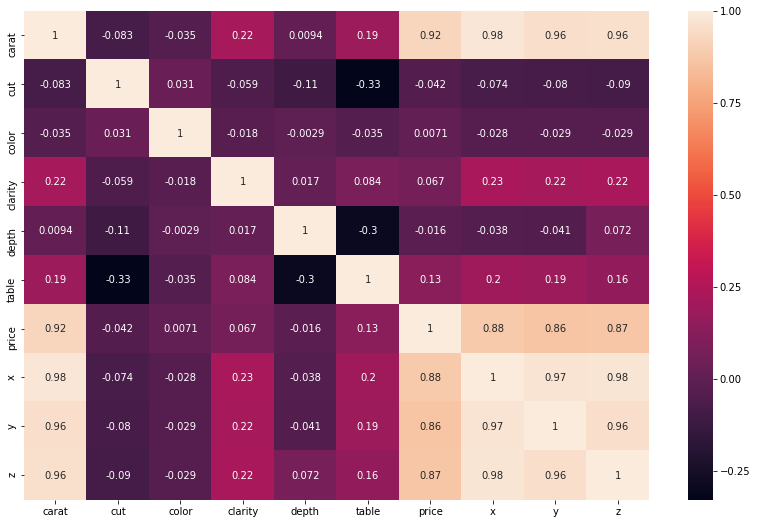

In [56]:
plt.figure(figsize=(14,9))

corrMatrix=data.corr()
sns.heatmap(corrMatrix,annot=True)
plt.show()

# CONCLUSIONS :

## 1. Depth is inversely related to Price

## 2. The Price of the Diamond is highly correlated to Carat, and its Dimensions

## 3. The Weight (Carat) of a diamond has the most significant impact on its Price

## 4. The Length(x) , Width(y) and Height(z) seems to be higly related to Price and even each other

## 5. Self Relation ie. of a feature to itself is 1 as expected

# Dimensions (x, y, z)

# As the Dimensions increases, Obviously the Prices Rises as more and more Natural Resources are Utilised.

# Feature Engineering

# Volume

In [57]:
data['volume'] = data['x'] * data['y'] * data['z']
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,4,0,6,61.5,55.0,326.0,3.95,3.98,2.43,38.202030
1,0.21,3,0,4,59.8,61.0,326.0,3.89,3.84,2.31,34.505856
3,0.29,3,2,0,62.4,58.0,334.0,4.20,4.23,2.63,46.724580
4,0.31,2,3,6,63.3,58.0,335.0,4.34,4.35,2.75,51.917250
5,0.24,0,3,1,62.8,57.0,336.0,3.94,3.96,2.48,38.693952


# Created the new feature volume

# Remove X, Y and Z 

In [58]:
data.drop(['x','y','z'], axis=1, inplace= True)

In [59]:
data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,4,0,6,61.5,55.0,326.0,38.202030
1,0.21,3,0,4,59.8,61.0,326.0,34.505856
3,0.29,3,2,0,62.4,58.0,334.0,46.724580
4,0.31,2,3,6,63.3,58.0,335.0,51.917250
5,0.24,0,3,1,62.8,57.0,336.0,38.693952


# Converting the data into appropriate data types

In [60]:
data.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
price      float64
volume     float64
dtype: object

In [61]:
num_attr = ['carat','depth','table','price','volume']

In [62]:
cat_attr = ['cut','color','clarity']

In [63]:
data[cat_attr] = data[cat_attr].astype('category')

In [64]:
data.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price       float64
volume      float64
dtype: object

# Divide the data into train and test

In [65]:
#Splitting the data
y=data["price"]
X=data.drop("price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=123)  

In [66]:
print(y_train.value_counts(normalize=True)*100)
print("\n")
print(y_test.value_counts(normalize=True)*100)

605.0      0.262687
698.0      0.238806
802.0      0.238806
789.0      0.234030
625.0      0.226866
828.0      0.222090
544.0      0.219701
720.0      0.219701
776.0      0.217313
844.0      0.205373
596.0      0.202985
552.0      0.202985
675.0      0.198209
765.0      0.195821
561.0      0.186269
1013.0     0.186269
526.0      0.183881
666.0      0.179104
505.0      0.176716
645.0      0.176716
863.0      0.171940
658.0      0.167164
684.0      0.160000
854.0      0.160000
984.0      0.160000
945.0      0.157612
743.0      0.155224
827.0      0.155224
710.0      0.152836
680.0      0.148060
             ...   
17416.0    0.002388
6877.0     0.002388
11484.0    0.002388
13133.0    0.002388
8481.0     0.002388
17650.0    0.002388
12940.0    0.002388
9714.0     0.002388
13177.0    0.002388
15814.0    0.002388
13247.0    0.002388
7787.0     0.002388
11855.0    0.002388
5172.0     0.002388
12655.0    0.002388
7054.0     0.002388
3126.0     0.002388
4701.0     0.002388
9716.0     0.002388


# Converting Categorical attributes to Numeric attributes

In [67]:
cat_attr = X_train.select_dtypes(include=['category']).columns
cat_attr

Index(['cut', 'color', 'clarity'], dtype='object')

# Using OneHotEncoder, converting Categorical attributes to Numeric attributes

In [68]:
enc = OneHotEncoder(drop = 'first')

enc.fit(X_train[cat_attr])

OneHotEncoder(drop='first')

In [69]:
col_names = enc.get_feature_names()

In [70]:
col_names

array(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x1_1', 'x1_2', 'x1_3', 'x1_4',
       'x1_5', 'x1_6', 'x2_1', 'x2_2', 'x2_3', 'x2_4', 'x2_5', 'x2_6',
       'x2_7'], dtype=object)

In [71]:
X_train_ohe=enc.transform(X_train[cat_attr]).toarray()
X_test_ohe=enc.transform(X_test[cat_attr]).toarray()

In [72]:
X_train_ohe[0:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        0.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
        0.],
       [0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0.]])

# Standardize the numerical attributes

# Using StandardScaler, standardize the numerical attributes

In [73]:
num_attr = ['carat','depth','table','volume']

In [74]:
scaler = StandardScaler()
scaler.fit(X_train[num_attr])

StandardScaler()

In [75]:
X_train_std = scaler.transform(X_train[num_attr])
X_test_std = scaler.transform(X_test[num_attr])

In [76]:
print(X_train_std.shape)
print(X_test_std.shape)

(41875, 4)
(10469, 4)


# Concatenate attribute

In [77]:
X_train_con = np.concatenate([X_train_std, X_train_ohe], axis=1)
X_test_con = np.concatenate([X_test_std, X_test_ohe], axis=1)

In [78]:
X_train_con.shape

(41875, 21)

In [79]:
X_test_con.shape

(10469, 21)

In [80]:
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

605.0      110
698.0      100
802.0      100
789.0       98
625.0       95
828.0       93
544.0       92
720.0       92
776.0       91
844.0       86
596.0       85
552.0       85
675.0       83
765.0       82
561.0       78
1013.0      78
526.0       77
666.0       75
505.0       74
645.0       74
863.0       72
658.0       70
684.0       67
854.0       67
984.0       67
945.0       66
743.0       65
827.0       65
710.0       64
680.0       62
          ... 
17416.0      1
6877.0       1
11484.0      1
13133.0      1
8481.0       1
17650.0      1
12940.0      1
9714.0       1
13177.0      1
15814.0      1
13247.0      1
7787.0       1
11855.0      1
5172.0       1
12655.0      1
7054.0       1
3126.0       1
4701.0       1
9716.0       1
8479.0       1
10668.0      1
15188.0      1
16957.0      1
11422.0      1
13289.0      1
1430.0       1
3397.0       1
845.0        1
5388.0       1
13104.0      1
Name: price, Length: 10349, dtype: int64
666.0      37
776.0      33
828.0      31
62

# Modelling

In [81]:
from sklearn.neighbors import KNeighborsRegressor

In [82]:
model= KNeighborsRegressor( )
model.fit(X_train_con, y_train)

KNeighborsRegressor()

In [83]:
train_pred = model.predict(X_train_con)
test_pred = model.predict(X_test_con)

# Evaluation

In [84]:
print("The Mean Absolute Error on train dataset: {} \n".format(mean_absolute_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Error on test dataset: {} \n".format(mean_absolute_error(y_pred=test_pred,y_true=y_test)))

print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))

print("The Root Mean Squared Error on train dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=train_pred,y_true=y_train))))
print("The Root Mean Squared Error on test dataset: {} \n".format(math.sqrt(mean_squared_error(y_pred=test_pred,y_true=y_test))))

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("The Mean Absolute Percentage Error on train dataset: {} \n".format(mean_absolute_percentage_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Absolute Percentage Error on test dataset: {} \n".format(mean_absolute_percentage_error(y_pred=test_pred,y_true=y_test)))


The Mean Absolute Error on train dataset: 333.5316107462687 

The Mean Absolute Error on test dataset: 408.06143853281117 

The Mean Squared Error on train dataset: 366628.53570388054 

The Mean Squared Error on test dataset: 565347.1209552011 

The Root Mean Squared Error on train dataset: 605.4985843946132 

The Root Mean Squared Error on test dataset: 751.8956848893343 

The Mean Absolute Percentage Error on train dataset: 10.736663299179028 

The Mean Absolute Percentage Error on test dataset: 13.317677583001727 



# IMPLEMENTATION OF KNN FROM SCRATCH

In [85]:
# Calculate mean absolute error (MAE) #
def mae_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        sum_error += abs(predicted[i] - actual[i])
    return sum_error / float(len(actual))

# Calculate root mean squared error #
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = actual[i] - predicted[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return math.sqrt(mean_error)

In [86]:
class K_Nearest_Neighbors_Regressor() : 
      
    def __init__( self, K ) :
          
        self.K = K
          
    # Function to store training set
          
    def fit( self, X_train, Y_train ) :
          
        self.X_train = X_train
          
        self.Y_train = Y_train
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X_train.shape
      
    # Function for prediction
          
    def predict( self, X_test ) :
          
        self.X_test = X_test
          
        # no_of_test_examples, no_of_features
          
        self.m_test, self.n = X_test.shape
          
        # initialize Y_predict
          
        Y_predict = np.zeros( self.m_test )
          
        for i in range( self.m_test ) :
              
            x = self.X_test[i]
              
            # find the K nearest neighbors from current test example
              
            neighbors = np.zeros( self.K )
              
            neighbors = self.find_neighbors(x)
              
            # calculate the mean of K nearest neighbors
              
            Y_predict[i] = np.mean( neighbors )
              
        return Y_predict
      
    # Function to find the K nearest neighbors to current test example
            
    def find_neighbors( self, x ) :
          
        # calculate all the euclidean distances between current test
        # example x and training set X_train
          
        euclidean_distances = np.zeros( self.m )
          
        for i in range( self.m ) :
              
            d = self.euclidean( x, self.X_train[i] )
              
            euclidean_distances[i] = d
          
        # sort Y_train according to euclidean_distance_array and 
        # store into Y_train_sorted
          
        inds = euclidean_distances.argsort()
          
        Y_train_sorted = self.Y_train[inds]
          
        return Y_train_sorted[:self.K]
      
    # Function to calculate euclidean distance
              
    def euclidean( self, x, x_train ) :
          
        return np.sqrt( np.sum( np.square( x - x_train ) ) )
    
    # Calculate root mean squared error #
    def rmse_metric(actual, predicted):
        sum_error = 0.0
        for i in range(len(actual)):
            prediction_error = predicted[i] - actual[i]
            sum_error += (prediction_error ** 2)
        mean_error = sum_error / float(len(actual))
        return math.sqrt(mean_error)

In [87]:
# Driver code
  
def main() :
      
    # Importing dataset
      
    # df = pd.read_csv( "diamonds.csv" )
  
#     X = data.iloc[:,:-1].values
  
#     Y = data.iloc[:,1].values
      
#     # Splitting dataset into train and test set
  
#     X_train, X_test, Y_train, Y_test = train_test_split( 
#       X, Y, test_size = 1/3, random_state = 0 )
      
    # Model training
      
    model = K_Nearest_Neighbors_Regressor(K = 3)
  
    model.fit(X_train_con, y_train)
      
    model1 = KNeighborsRegressor(n_neighbors = 3)
      
    model1.fit(X_train_con, y_train)
      
    # Prediction on test set
  
    Y_pred = model.predict(X_test_con)
      
    Y_pred1 =  model1.predict(X_test_con)
      
    print( "Predicted values by our model     :  ", np.round( Y_pred[:3], 2 ) ) 
      
    print( "Predicted values by sklearn model :  ", np.round( Y_pred1[:3], 2 ) )
      
    print( "Real values                       :  ", y_test[:3] )
    

#     print(y_test)
#     print(Y_pred)
    
#     RMSE = model.rmse_metric(np.array(y_test), numpy.nan_to_num(Y_pred))
#     print('RMSE: %.3f' % RMSE)
    
    return Y_pred


if __name__ == "__main__" : 
      
    main()

Predicted values by our model     :   [2452.   6935.33 3589.  ]
Predicted values by sklearn model :   [3226.33  832.33  622.  ]
Real values                       :   128      2763.0
23710     632.0
6742      579.0
Name: price, dtype: float64


In [88]:
Y_prediction=main()

Predicted values by our model     :   [2452.   6935.33 3589.  ]
Predicted values by sklearn model :   [3226.33  832.33  622.  ]
Real values                       :   128      2763.0
23710     632.0
6742      579.0
Name: price, dtype: float64


In [89]:
print( "Predicted values by our model     :  ", np.round( Y_prediction[:3], 2 ) ) 
      
# print( "Predicted values by sklearn model :  ", np.round( Y_pred1[:3], 2 ) )

Predicted values by our model     :   [2452.   6935.33 3589.  ]


In [90]:
Y_prediction

array([2452.        , 6935.33333333, 3589.        , ...,  961.        ,
       4814.33333333, 2842.33333333])

In [91]:
y_test

128       2763.0
23710      632.0
6742       579.0
12918     5376.0
40387     1132.0
19603     8224.0
26340      645.0
2282      3160.0
18742     7658.0
36619      478.0
49230     2083.0
18277     7423.0
20703      625.0
28052      660.0
16629     6649.0
29864      710.0
17139     6840.0
38788     1046.0
35196      891.0
19752     8319.0
6248      4008.0
1924      3082.0
163       2771.0
19261     7989.0
39580     1082.0
24681    13037.0
50576     2279.0
37553      988.0
1175      2929.0
41947      504.0
          ...   
29177      694.0
28239      666.0
8827      4478.0
51160     2345.0
12472     5250.0
18564     7571.0
43944      516.0
3584      3422.0
12063     5154.0
28519      674.0
23669    11716.0
39062     1059.0
49465     2112.0
44145     1562.0
34433      863.0
42128     1279.0
34621      872.0
1722       561.0
50968     2326.0
14238     5768.0
43344     1406.0
49279     2090.0
43823     1443.0
47990      533.0
47636     1882.0
25944    15110.0
19194     7945.0
52930     2591

In [92]:
Y_prediction.shape

(10469,)

In [93]:
y_test1=np.array(y_test)

In [94]:
y_test1

array([2763.,  632.,  579., ..., 2591., 1012., 1815.])

In [95]:
Y_prediction

array([2452.        , 6935.33333333, 3589.        , ...,  961.        ,
       4814.33333333, 2842.33333333])

In [96]:
import numpy

In [97]:
Y_prediction1=numpy.nan_to_num(Y_prediction)

In [98]:
RMSE = rmse_metric(y_test1, Y_prediction1)
print('RMSE: %.3f' % RMSE)

RMSE: 4852.635


# END